In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [13]:
# Load the Boston Housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Load the dataset
boston = fetch_california_housing()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

In [14]:
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 # Create a linear regression model
model = LinearRegression()

In [15]:
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([2.04727951, 2.07374938, 2.27643679, ..., 2.05583915, 2.15263076,
       1.97264986])

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Model Performance:
Mean Absolute Error (MAE): 0.8995023932561842
Mean Squared Error (MSE): 1.2940588825478394
Root Mean Squared Error (RMSE): 1.1375670892513723
R^2 Score: 0.012477093765801861


In [17]:
# Cross-validation for more robust evaluation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print("\nCross-validation RMSE scores:")
print(cv_rmse)
print(f"Average CV RMSE: {cv_rmse.mean()}")


Cross-validation RMSE scores:
[1.03886981 1.2328661  1.27058133 0.87293693 1.36246546 1.12843453
 1.03343422 1.1844963  1.45529933 1.03565448]
Average CV RMSE: 1.1615038475493706


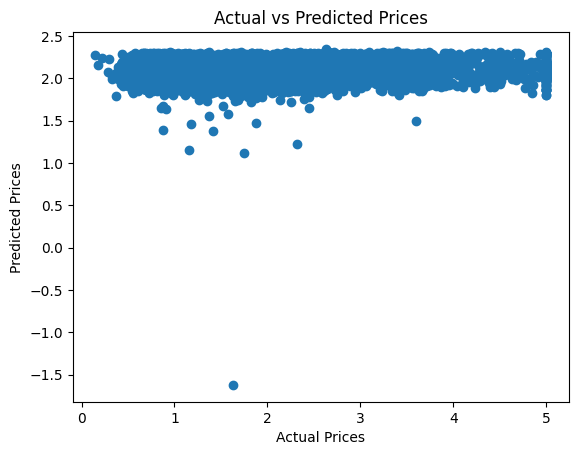

In [18]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

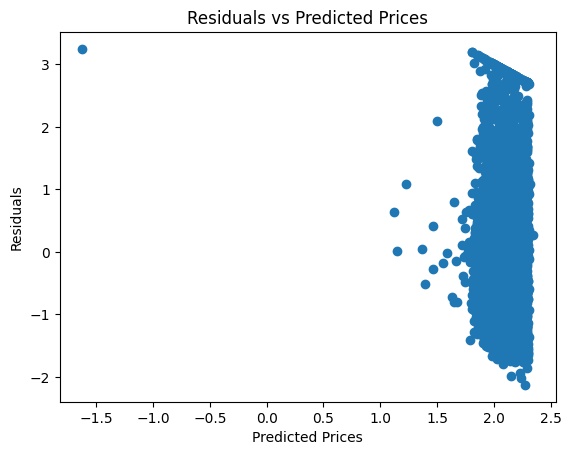

In [19]:
# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()